In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_57.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_63.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_205.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_144.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_159.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_34.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_22.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_36.png
/kaggle/input/malaria-detection-dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_c

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import random

In [3]:
train_dir = '/kaggle/input/malaria-detection-dataset/Dataset/Train/'
test_dir='/kaggle/input/malaria-detection-dataset/Dataset/Test/'

In [4]:
data=[]
for i in os.listdir(train_dir):
    folder_path = os.path.join(train_dir,i)
    if i=='Parasite':
        label=1
    else:
        label=0
    for j in os.listdir(folder_path):
        img_path = os.path.join(folder_path,j)
        img = cv2.imread(img_path)
        img=cv2.resize(img,(256,256))
        data.append([img,label])
        
        
       

In [5]:
random.shuffle(data)

In [6]:
X=np.array([i[0]/255 for i in data])
y=np.array([i[1] for i in data])

In [7]:
print(X.shape)
print(y.shape)

(416, 256, 256, 3)
(416,)


In [8]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

2025-08-26 15:18:38.997062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756221519.319077      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756221519.401060      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Without Data augumentation

In [9]:
from keras.models import Sequential
model = keras.models.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-26 15:18:56.980410: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5584 - loss: 1.0946 - val_accuracy: 0.6429 - val_loss: 0.6856
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6868 - loss: 0.6743 - val_accuracy: 0.5714 - val_loss: 0.6019
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6866 - loss: 0.5622 - val_accuracy: 0.8095 - val_loss: 0.4906
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7776 - loss: 0.4685 - val_accuracy: 0.8095 - val_loss: 0.4347
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7610 - loss: 0.4943 - val_accuracy: 0.6905 - val_loss: 0.5191


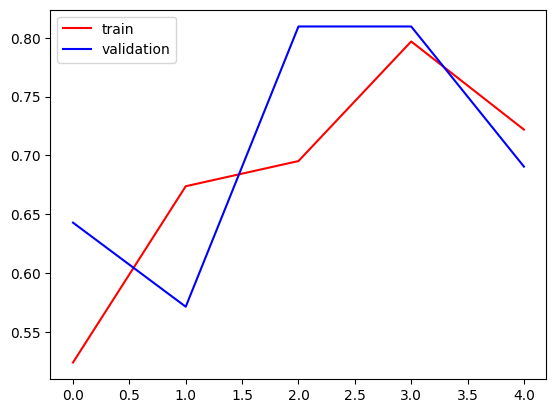

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

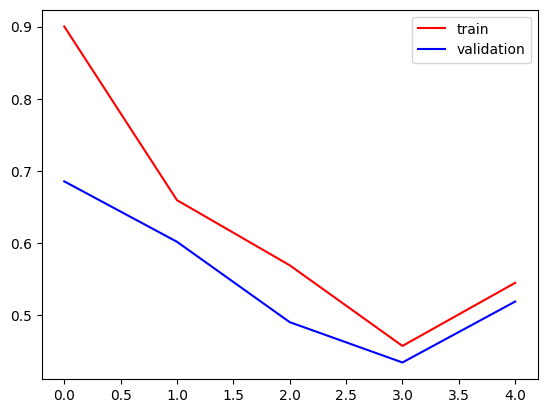

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### with DataAugmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/malaria-detection-dataset/Dataset/Train',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 150x150
        batch_size=16,
        class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/malaria-detection-dataset/Dataset/Test',
        target_size=(256, 256),
        batch_size=16,
        class_mode='binary')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [17]:
model.fit(
    train_generator,
    steps_per_epoch=2000//16,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=800//16)
    


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 26/125 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.4436 - loss: 0.9531

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 318ms/step - accuracy: 0.4788 - loss: 0.8186 - val_accuracy: 0.6791 - val_loss: 0.6779
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.5347 - loss: 0.6911 - val_accuracy: 0.6791 - val_loss: 0.6882
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 295ms/step - accuracy: 0.5963 - loss: 0.6607 - val_accuracy: 0.6119 - val_loss: 0.7243
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 299ms/step - accuracy: 0.7388 - loss: 0.5062 - val_accuracy: 0.5522 - val_loss: 0.7262
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/step - accuracy: 0.8912 - loss: 0.3308 - val_accuracy: 0.7090 - val_loss: 0.8326
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9369 - loss: 0.2026 - val_accuracy: 0.7313 - val_loss: 1.5384
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 299ms/step - accuracy: 0.9245 - loss: 0.2384 - val_accuracy: 0.8806 - val_loss: 0.2858
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.9682 - loss: 0.0963 - val